<img src='http://drive.google.com/uc?export=view&id=1Lv8NU_SuGQ9uVjU8N6_NwNi72qbSnbQL'>

# <font color='lightblue'>Exploritory Data Analysis</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there!

In this project you will:

1.  Choose and download a dataset
2.  Get summary statistics for key variables
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset



Import python libraries


# <font color='lightblue'>1. Data </font>

## <font color='lightblue'> 1.1 Mounting the drive </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font color='lightblue'>Loading data & Importing Libraries</font>

**Action:** Import your data into colaboratory.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/happyscore_income.csv')
df = df.drop(['avg_satisfaction','country.1'], axis=1)
df[df.duplicated()]
df.head(6)

,country,adjusted_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP
0,Armenia,37,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821
1,Angola,26,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778
2,Argentina,60,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351
3,Austria,59,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723
4,Australia,65,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358
5,Azerbaijan,46,2.27,3381.60,2931.480000,24.215000,'Central and Eastern Europe',5.212,1.02389


In [ ]:
df.shape

(111, 9)

**Action:** Determine the types of data are you dealing with.

In [ ]:
#Summary of a cleaned Data
df.isnull().sum()

country                  0
adjusted_satisfaction    0
std_satisfaction         0
avg_income               0
median_income            0
income_inequality        0
region                   0
happyScore               0
GDP                      0
dtype: int64

In [ ]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    int64  
 2   std_satisfaction       111 non-null    float64
 3   avg_income             111 non-null    float64
 4   median_income          111 non-null    float64
 5   income_inequality      111 non-null    float64
 6   region                 111 non-null    object 
 7   happyScore             111 non-null    float64
 8   GDP                    111 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.9+ KB


## <font color='lightblue'>2. Summary statistics</font>

In [ ]:
#means vs median (adjusted_satisfaction >= && avg_income >>  && income_inequality >=  && happyScore >= )
#75%tile vs max value (pretty close )
df.describe()

,adjusted_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [ ]:
#happyScore is Numerical Ratio scaled Continous attr(float64)
df.happyScore.unique( )

array([4.35 , 4.033, 6.574, 7.2  , 7.284, 5.212, 4.694, 6.937, 3.587,
       4.218, 2.905, 3.34 , 5.89 , 6.983, 4.332, 5.813, 7.427, 7.587,
       6.67 , 4.252, 5.14 , 6.477, 7.226, 5.689, 6.505, 6.75 , 4.369,
       7.527, 4.885, 5.975, 5.429, 6.329, 4.512, 7.406, 6.575, 3.896,
       6.867, 4.297, 4.633, 4.857, 4.788, 5.759, 4.8  , 5.399, 6.94 ,
       7.278, 4.565, 4.686, 7.561, 5.948, 5.987, 4.419, 5.286, 3.819,
       5.589, 5.855, 4.876, 4.271, 4.571, 4.898, 5.833, 6.946, 5.098,
       5.013, 5.889, 3.681, 3.995, 4.874, 4.436, 5.477, 7.187, 5.77 ,
       4.971, 3.845, 5.268, 5.828, 7.378, 7.522, 4.514, 6.786, 5.824,
       5.073, 5.194, 5.791, 5.102, 5.878, 5.124, 5.123, 5.716, 3.465,
       7.364, 5.848, 5.995, 4.507, 3.904, 6.13 , 3.667, 2.839, 6.455,
       4.786, 4.739, 5.332, 3.781, 4.681, 3.931, 7.119, 6.485, 5.36 ,
       4.642, 5.129, 4.61 ])

In [ ]:
#HappyScore unique values since not categorical 
df.adjusted_satisfaction.value_counts().head(8)

43    6
55    5
48    5
37    5
40    4
45    4
46    4
47    4
Name: adjusted_satisfaction, dtype: int64

**Action:** Estimate the summary statistics of some of the key variables

In [ ]:
#get the min and max of avg_income 
avg_income_min = df['avg_income'].min()
avg_income_max = df['avg_income'].max()

#get the min and max of happyScore
HappyS_min = df['happyScore'].min()
HappyS_max = df['happyScore'].max()

#print out the values
print("min avg_income  = ", avg_income_min)
print("max avg_income  = ", avg_income_max)
print("min HappyScore  = ", HappyS_min)
print("max HappyScore  = ", HappyS_max)


min avg_income  =  572.88
max avg_income  =  26182.275
min HappyScore  =  2.839
max HappyScore  =  7.587000000000001


In [ ]:
#get the mean
adjusted_satisfaction_mean = df['adjusted_satisfaction'].mean()

#geth the mode

adjusted_satisfaction_mode = df['adjusted_satisfaction'].mode()
#get the median
adjusted_satisfaction_median = df['adjusted_satisfaction'].median()

#get the variance
adjusted_satisfaction_std = df['adjusted_satisfaction'].std()

print("the mean  of the adjusted_satisfaction is: ", adjusted_satisfaction_mean)
print("the most common  general satisfaction. is: ", adjusted_satisfaction_mode )

print("the middle most  adjusted_satisfaction is: ", adjusted_satisfaction_median)
print("the standard deviation of  adjusted_satisfactions is: ", adjusted_satisfaction_std)

the mean  of the adjusted_satisfaction is:  48.729729729729726
the most common  general satisfaction. is:  0    43
dtype: int64
the middle most  adjusted_satisfaction is:  48.0
the standard deviation of  adjusted_satisfactions is:  12.36413136745742


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

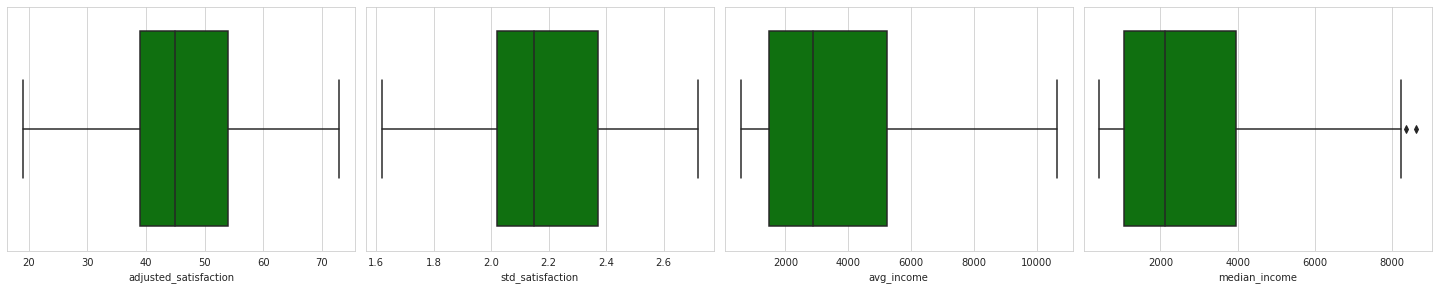

In [ ]:
l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(5*number_of_columns,4*number_of_rows))
for i in range(1,len(l)-4):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

adjusted_satisfaction      15.000000
std_satisfaction            0.340000
avg_income               5091.945882
median_income            3404.625000
income_inequality          11.460000
happyScore                  1.336000
GDP                         0.621410
dtype: float64


In [ ]:

df.shape

(85, 9)

### <font color='lightblue'>2.2  Statistics by Region</font>

In [ ]:
gdp_region = df.groupby('region').GDP.sum().sort_values(ascending=False)
gdp_region


region
'Central and Eastern Europe'         22.13601
'Latin America and Caribbean'        14.21589
'Sub-Saharan Africa'                  9.47373
'Western Europe'                      8.60568
'Southeastern Asia'                   5.30855
'Middle East and Northern Africa'     4.91427
'Eastern Asia'                        2.98905
'Southern Asia'                       2.83316
Name: GDP, dtype: float64

In [ ]:
df.groupby('region').income_inequality.mean().sort_values(ascending = False)

region
'Latin America and Caribbean'        49.823925
'Sub-Saharan Africa'                 41.784691
'Middle East and Northern Africa'    39.686667
'Southeastern Asia'                  39.464667
'Eastern Asia'                       34.607262
'Western Europe'                     34.153393
'Southern Asia'                      34.043800
'Central and Eastern Europe'         31.227329
Name: income_inequality, dtype: float64

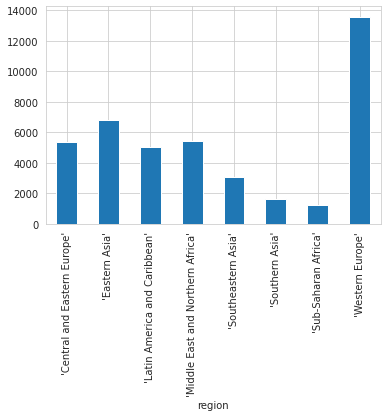

In [ ]:
%matplotlib inline
df.groupby('region').avg_income.mean().plot(kind = 'bar')

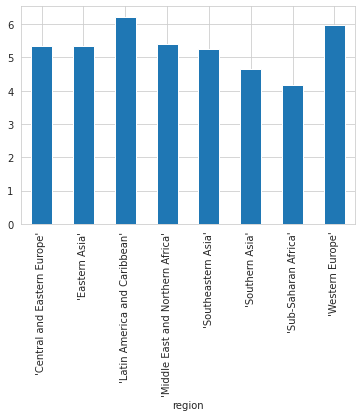

In [ ]:
#Latin America and Western Europe are the Happiest
#Sub-Saharian Africa and Souther Asia are the least Happy 
%matplotlib inline
df.groupby('region').happyScore.mean().plot(kind = 'bar')

## <font color='lightblue'>3. Visualize the data</font>

**Action:** Visualize the distribution of values for some key variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

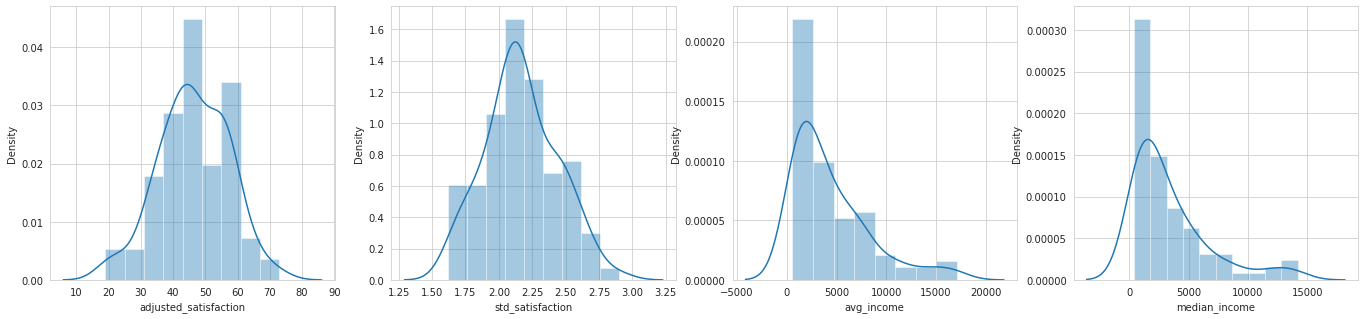

In [ ]:
#satisfaction normal distribution is symmetric 
#most incomes are positively skewed Mean median left side

number_of_columns=9
plt.figure(figsize=(6*number_of_columns,6*number_of_rows))
for i in range(1,len(l)-4):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


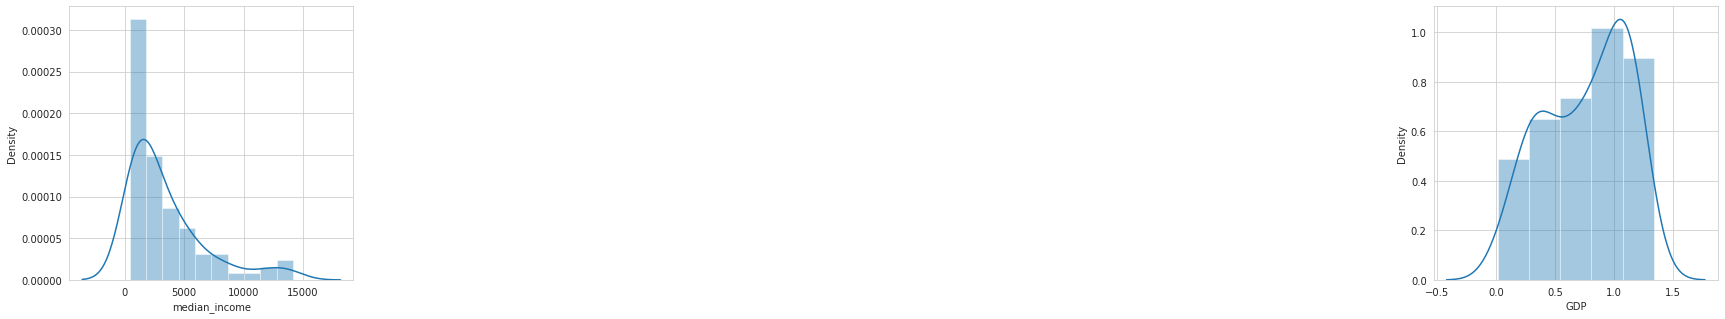

In [ ]:
#GDP is negativey skewed Mean median left side on the right side
plt.figure(figsize=(6*number_of_columns,6*number_of_rows))
for i in range(4,9,4):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

(0.0, 27099.55)

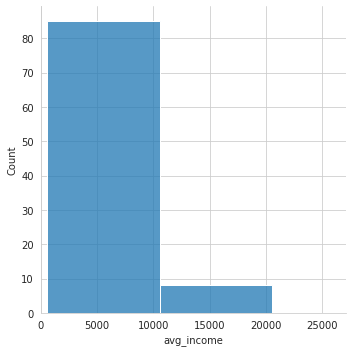

In [ ]:
sns.displot(df, x='avg_income', binwidth=10000)
plt.xlim(0,df.avg_income.max() +10000)


In [ ]:
#the Probability of a Country having more than 10 000 $
df_10k = (len(df[df.avg_income>10000]) / len(df.avg_income) * 100 )
print("Only {:.2f}% of the countries are above 10k".format(df_10k) )

Only 9.68% of the countries are above 10k


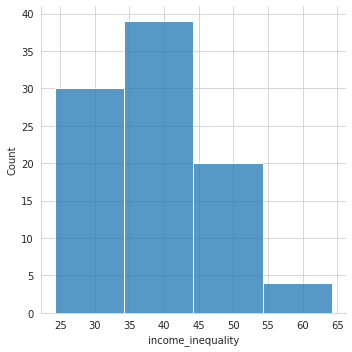

In [ ]:
#many countries have a lot of income inequalities 
sns.displot(df, x='income_inequality', binwidth=10)


### <font color='lightblue'>Visual lines of Mean Median Mode</font>

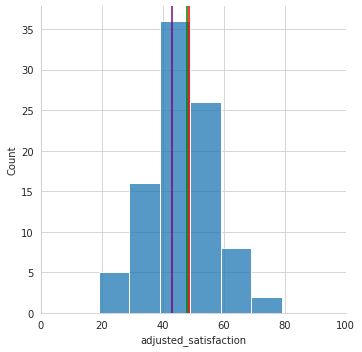

In [ ]:

sns.displot(df,x='adjusted_satisfaction', binwidth=10)
plt.xlim(0,100)
plt.axvline(adjusted_satisfaction_mean, color="red")
plt.axvline(adjusted_satisfaction_mode[0], color="purple")
plt.axvline(adjusted_satisfaction_median, color="green")

**Q1:** Explain your choice of plots using the five visualization components: 
1. Data component -- what kinds of data are you dealing with?
 >*Numerical Ratio scaled Continous attr(float64)*
2. Graphical component -- what kinds of plot can you use?
 >*Density plots, histograms, Scatter plots*
3. Label component -- what should be on the plot axis?
 >*Key variables : income, GDP , HappyScore*
4. Esthetic component -- what should you plot say, and how best to do this?
 >*Histogram for an overall view of the data and data distribution*
Scatter plots and heatmaps for correlation
5. Ethical component -- Is the graph misleading, what is left out?
>*No,the graph are helpful. Machine Learning Applications*

## <font color='lightblue'>4. Correlations</font>

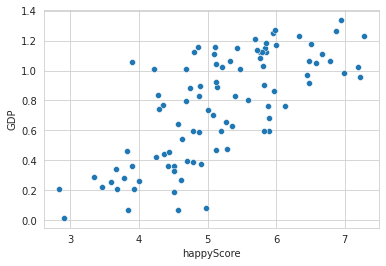

In [ ]:

#plot a scaterplot
sns.scatterplot(data=df, x='happyScore',y='GDP')


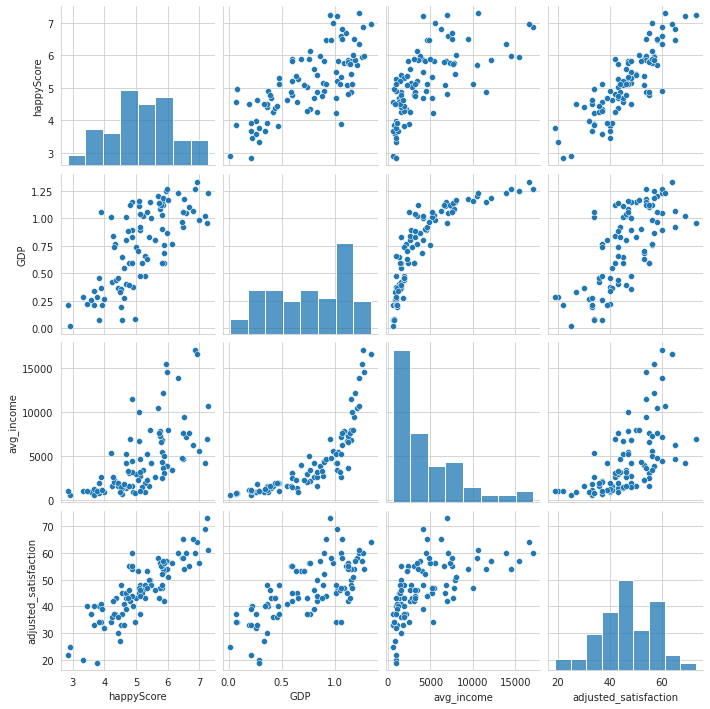

In [ ]:
#let's choose some varibles to look at 

df_pairs = df[["happyScore","GDP","avg_income","adjusted_satisfaction"]] 

#use the pairplot method to look at all combinations of these variables

sns.pairplot(df_pairs)

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.





In [ ]:
pearsoncorr = df.corr(method='pearson')


**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

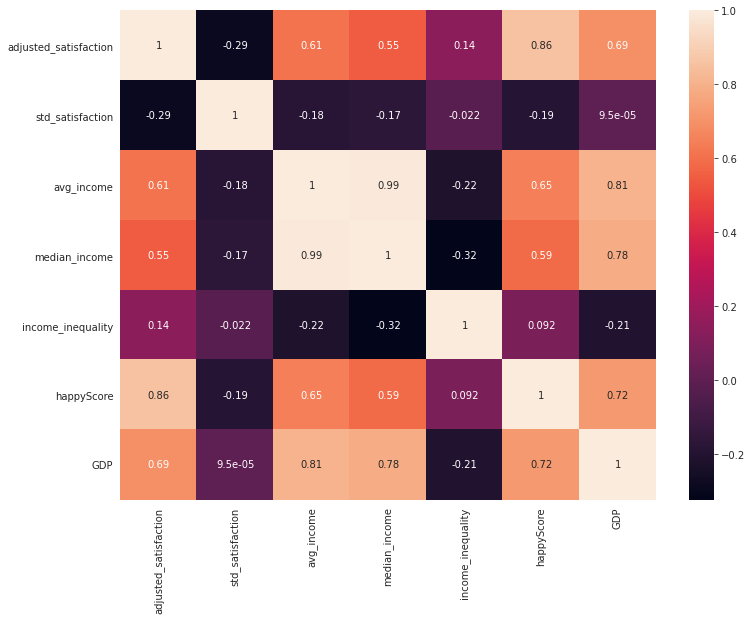

In [ ]:

corrmat = df.corr()

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=False,
            annot=True)

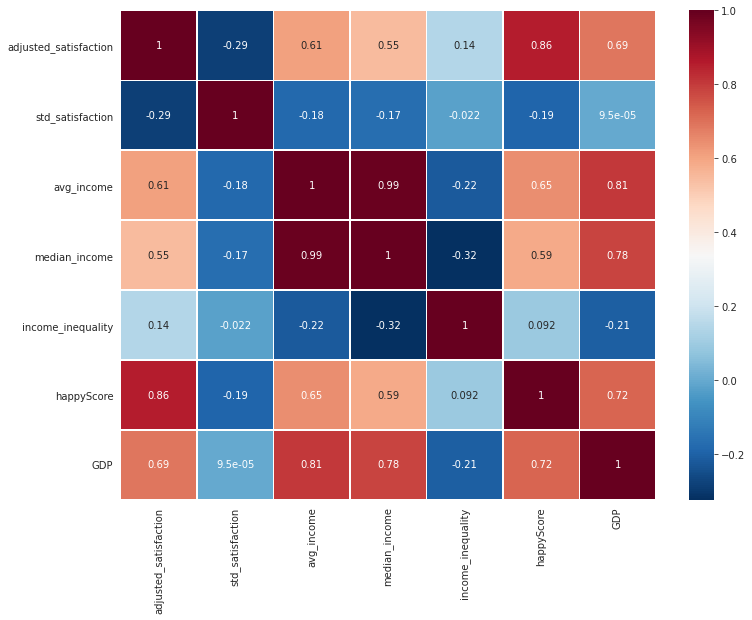

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## <font color='green'>5. Discussion</font>

**Q3:** Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense? 
> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).
>>This exploritory data analysis helped me to  better understand my dataset:


*   The distribution of my key variables 
*   The frequency range of my variables 
*   With the dataset that, the  a higher the GDP is  does improve incomes
*   I can estimate the trend of the  GDP with the income
*   The more satisfied countries are the happier they consider to be
*   There is more inequalities when the GDP is lower
*   Latin America and Western Europe are the 2 Happiest but Latin America
    not the highest incomes
*   The more the average income increase , the more the satisfaction decrease ?



<img src='https://addbcdbimages.s3.amazonaws.com/wb/looney_tunes.jpg?u=' width="500" align = 'midle'>  